In [0]:
 from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd()
os.chdir('/content/drive/My Drive/FSDP2019_DEEP_LEARNING/day30andcodechallenge/pickle_file/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

In [0]:
import keras

Using TensorFlow backend.


In [0]:
#model.summary()

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images[0].shape



(28, 28)

In [0]:
train_images[0]

In [0]:
train_labels[0]

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [0]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
test_labels[0]

7

In [0]:
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [0]:
train_images[0]


In [0]:
train_labels[0]

5

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
print train_labels.shape

(60000, 10)


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5,5), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))



In [0]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_log=model.fit(train_images, train_labels, epochs=30,verbose=1,batch_size=64,validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/30
40199/40199 [==============================] - 4s 94us/step - loss: 1.4453e-04 - acc: 1.0000 - val_loss: 0.0251 - val_acc: 0.9969
Epoch 2/30
40199/40199 [==============================] - 3s 82us/step - loss: 8.0736e-05 - acc: 1.0000 - val_loss: 0.0178 - val_acc: 0.9975
Epoch 3/30
40199/40199 [==============================] - 3s 82us/step - loss: 2.8028e-04 - acc: 0.9999 - val_loss: 0.0168 - val_acc: 0.9976
Epoch 4/30
40199/40199 [==============================] - 3s 82us/step - loss: 1.5647e-04 - acc: 0.9999 - val_loss: 0.0136 - val_acc: 0.9981
Epoch 5/30
40199/40199 [==============================] - 3s 82us/step - loss: 7.8500e-05 - acc: 1.0000 - val_loss: 0.0234 - val_acc: 0.9970
Epoch 6/30
40199/40199 [==============================] - 3s 83us/step - loss: 4.2658e-04 - acc: 0.9999 - val_loss: 0.0170 - val_acc: 0.9978
Epoch 7/30
40199/40199 [==============================] - 3s 82us/step - loss: 1.7758e-04 - acc: 1.0000 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 57us/step


In [0]:
print(model_log.history.keys())


['acc', 'loss', 'val_acc', 'val_loss']


In [0]:
model_log.history['val_acc']

In [0]:
test_images[0].shape

(28, 28, 1)

In [0]:
test_acc


0.9909

In [0]:
model.layers

In [0]:
test_images[10].shape

(28, 28, 1)

In [0]:
test_data = test_images[10].reshape(1,28,28,1)

In [0]:
test_data.shape

(1, 28, 28, 1)

In [0]:
prediction = model.predict(test_data)

In [0]:
prediction.argmax(axis=1)

array([0])

Set axis=-1 means, extract largest indices in each row. Here we have only one row.

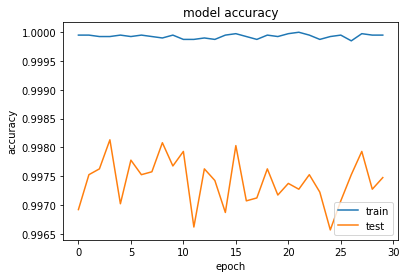

In [0]:
import os
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
#plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

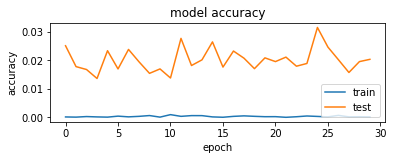

In [0]:
import os
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


    A plot of accuracy on the training and validation datasets over training epochs.
    A plot of loss on the training and validation datasets over training epochs.



# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_classifier_20170212.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(decision_tree_model, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()


In [0]:
import pickle
decision_tree_pkl_filename = 'product.pkl'

decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')

pickle.dump(model, decision_tree_model_pkl)

decision_tree_model_pkl.close()


In [0]:
import pickle

m = open('r/r1/product.pkl', 'rb') 





In [0]:
p=pickle.load(m)

In [0]:
pred=p.predict(test_data)

In [0]:
pred

array([[1.0000000e+00, 3.4365543e-17, 1.9354832e-14, 1.6049473e-23,
        1.4648994e-22, 5.8095677e-15, 7.2863587e-15, 7.2093272e-16,
        1.2822717e-17, 2.1638907e-15]], dtype=float32)